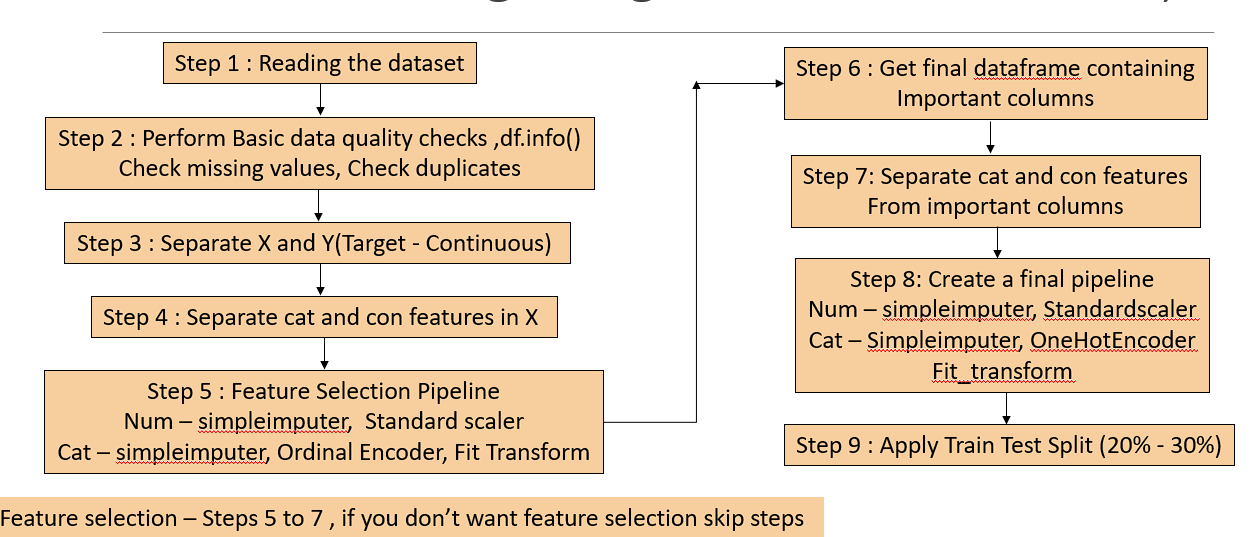

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1 : Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Step 2: Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
m = df.isna().sum()
m[m>0]


Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
df.duplicated().sum()

0

### Step 3 : Seperate X and Y(Life Expectancy)

In [6]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
X = df.drop(columns=['Life expectancy '])
Y = df[['Life expectancy ']]

In [8]:
X.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
Y.head()

,Life expectancy
0,65.0
1,59.9
2,59.9
3,59.5
4,59.2


In [10]:
ymean = Y.mean()[0]
Y['Life expectancy '] = Y['Life expectancy '].fillna(ymean)

In [11]:
Y.isna().sum()

Life expectancy     0
dtype: int64

### Step 4 : Seperate cat and con features for X

In [12]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [13]:
cat

['Country', 'Status']

In [14]:
con

['Year',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

### Create a feature selection pipeline for X

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [16]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [17]:
cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('ordinal', OrdinalEncoder())])

In [18]:
pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)]).set_output(transform='pandas')

In [19]:
pre1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Year', 'Adult Mortality', 'infant deaths',
                                  'Alcohol', 'percentage expenditure',
                                  'Hepatitis B', 'Measles ', ' BMI ',
                                  'under-five deaths ', 'Polio',
                                  'Total expenditure', 'Diphtheria ',
                                  ' HIV/AIDS', 'GDP', 'Population',
                                  ' thinness  1-19 years',
                                  ' thinness 5-9 years',
                                  'Income composition of resources',
                                  'Schooling']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Country', 'Status'])])

In [20]:
X_pre = pre1.fit_transform(X)
X_pre.head()

,num__Year,num__Adult Mortality,num__infant deaths,num__Alcohol,num__percentage expenditure,num__Hepatitis B,num__Measles,num__ BMI,num__under-five deaths,num__Polio,...,num__Diphtheria,num__ HIV/AIDS,num__GDP,num__Population,num__ thinness 1-19 years,num__ thinness 5-9 years,num__Income composition of resources,num__Schooling,cat__Country,cat__Status
0,1.621762,0.792119,0.268824,-1.156989,-0.335570,-0.783807,-0.110384,-0.967349,0.255359,-3.279423,...,-0.735391,-0.323445,-0.453371,0.435183,2.815209,2.775386,-0.737973,-0.585017,0.0,1.0
1,1.404986,0.856601,0.285786,-1.156989,-0.334441,-0.914281,-0.168124,-0.992434,0.274060,-1.053699,...,-0.862233,-0.323445,-0.451232,-0.183349,2.883439,2.819978,-0.752600,-0.615649,0.0,1.0
2,1.188210,0.832421,0.302749,-1.156989,-0.334594,-0.827298,-0.173531,-1.017519,0.292761,-0.882489,...,-0.777671,-0.323445,-0.449799,0.398066,2.928926,2.864570,-0.781853,-0.646281,0.0,1.0
3,0.971434,0.864662,0.328193,-1.156989,-0.332096,-0.696824,0.032045,-1.042605,0.317696,-0.668478,...,-0.650830,-0.323445,-0.446924,-0.120968,2.974413,2.931458,-0.815982,-0.676912,0.0,1.0
4,0.754658,0.888843,0.345155,-1.156989,-0.367862,-0.653333,0.051757,-1.062673,0.342631,-0.625675,...,-0.608549,-0.323445,-0.492539,-0.134268,3.042643,2.976051,-0.859862,-0.768808,0.0,1.0


In [21]:
X_pre.isna().sum()

num__Year                               0
num__Adult Mortality                    0
num__infant deaths                      0
num__Alcohol                            0
num__percentage expenditure             0
num__Hepatitis B                        0
num__Measles                            0
num__ BMI                               0
num__under-five deaths                  0
num__Polio                              0
num__Total expenditure                  0
num__Diphtheria                         0
num__ HIV/AIDS                          0
num__GDP                                0
num__Population                         0
num__ thinness  1-19 years              0
num__ thinness 5-9 years                0
num__Income composition of resources    0
num__Schooling                          0
cat__Country                            0
cat__Status                             0
dtype: int64

### Perform feature selection by Forward selection

In [22]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()
sel = SequentialFeatureSelector(lr, direction='forward', n_features_to_select='auto')
sel.fit_transform(X_pre, Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Adult Mortality', 'num__Hepatitis B', 'num__ BMI ',
       'num__Polio', 'num__Diphtheria ', 'num__ HIV/AIDS', 'num__GDP',
       'num__Income composition of resources', 'num__Schooling',
       'cat__Status'], dtype=object)

In [24]:
len(sel_cols)

10

In [25]:
sel_cols[0]

'num__Adult Mortality'

In [26]:
sel_cols[0].split('__')

['num', 'Adult Mortality']

In [27]:
sel_cols[0].split('__')[1]

'Adult Mortality'

In [28]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)


In [29]:
imp_cols


['Adult Mortality',
 'Hepatitis B',
 ' BMI ',
 'Polio',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Income composition of resources',
 'Schooling',
 'Status']

In [30]:
X_sel = X[imp_cols]
X_sel.head()

,Adult Mortality,Hepatitis B,BMI,Polio,Diphtheria,HIV/AIDS,GDP,Income composition of resources,Schooling,Status
0,263.0,65.0,19.1,6.0,65.0,0.1,584.259210,0.479,10.1,Developing
1,271.0,62.0,18.6,58.0,62.0,0.1,612.696514,0.476,10.0,Developing
2,268.0,64.0,18.1,62.0,64.0,0.1,631.744976,0.470,9.9,Developing
3,272.0,67.0,17.6,67.0,67.0,0.1,669.959000,0.463,9.8,Developing
4,275.0,68.0,17.2,68.0,68.0,0.1,63.537231,0.454,9.5,Developing


### Step 7 : Seperate categorical and continuous features for X_sel

In [31]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [32]:
cat_sel

['Status']

In [33]:
con_sel

['Adult Mortality',
 'Hepatitis B',
 ' BMI ',
 'Polio',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Income composition of resources',
 'Schooling']

### Step 8 : Create a final preprocessing pipeline
Cat - OneHotEncoding

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [36]:
cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [37]:
pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)]).set_output(transform='pandas')

In [38]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre.head()

,num__Adult Mortality,num__Hepatitis B,num__ BMI,num__Polio,num__Diphtheria,num__ HIV/AIDS,num__GDP,num__Income composition of resources,num__Schooling,cat__Status_Developed,cat__Status_Developing
0,0.792119,-0.783807,-0.967349,-3.279423,-0.735391,-0.323445,-0.453371,-0.737973,-0.585017,0.0,1.0
1,0.856601,-0.914281,-0.992434,-1.053699,-0.862233,-0.323445,-0.451232,-0.752600,-0.615649,0.0,1.0
2,0.832421,-0.827298,-1.017519,-0.882489,-0.777671,-0.323445,-0.449799,-0.781853,-0.646281,0.0,1.0
3,0.864662,-0.696824,-1.042605,-0.668478,-0.650830,-0.323445,-0.446924,-0.815982,-0.676912,0.0,1.0
4,0.888843,-0.653333,-1.062673,-0.625675,-0.608549,-0.323445,-0.492539,-0.859862,-0.768808,0.0,1.0


### Apply train test split
(test data - unseen data to my model 20% - 30%)

In [39]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=42)

In [40]:
xtrain.shape

(2350, 11)

In [41]:
xtest.shape

(588, 11)

In [42]:
xtrain.head()

,num__Adult Mortality,num__Hepatitis B,num__ BMI,num__Polio,num__Diphtheria,num__ HIV/AIDS,num__GDP,num__Income composition of resources,num__Schooling,cat__Status_Developed,cat__Status_Developing
456,-0.312140,0.564426,-0.646257,0.658396,0.659867,-0.224960,-0.263213,-0.138280,-0.033645,0.0,1.0
462,-0.102572,0.390460,-0.816837,0.358779,-3.103102,-0.185566,-0.401873,-0.333302,-0.309331,0.0,1.0
2172,-0.175115,0.694900,0.306985,0.701199,0.702148,-0.323445,-0.364409,0.500419,0.272673,0.0,1.0
2667,-1.222952,0.651408,1.049510,0.658396,0.659867,-0.323445,-0.181434,0.437036,0.824045,0.0,1.0
381,-0.562009,0.694900,-0.520830,0.701199,0.490745,-0.323445,0.769854,0.924592,0.395200,0.0,1.0


In [43]:
ytrain.head()

,Life expectancy
456,72.3
462,73.0
2172,74.6
2667,74.9
381,74.8


In [44]:
xtest.head()

,num__Adult Mortality,num__Hepatitis B,num__ BMI,num__Polio,num__Diphtheria,num__ HIV/AIDS,num__GDP,num__Income composition of resources,num__Schooling,cat__Status_Developed,cat__Status_Developing
2546,-0.336321,-0.000962,0.507668,0.016360,-3.145382,-0.323445,-0.364763,0.027489,-0.186804,0.0,1.0
650,-0.416924,0.390460,0.989306,0.572791,0.575306,-0.323445,0.357437,0.744196,0.578991,1.0,0.0
1740,-0.320200,-3.219323,0.944152,0.401582,0.406184,-0.323445,-0.049222,0.641810,0.487095,0.0,1.0
177,-1.271314,0.651408,1.230125,0.658396,0.659867,-0.323445,1.381931,0.924592,0.762781,0.0,1.0
1377,2.122066,0.390460,-1.203151,-3.193818,-0.016622,3.222012,-0.494011,-0.889116,-1.105757,0.0,1.0


In [45]:
ytest.head()

,Life expectancy
2546,73.7
650,75.9
1740,74.2
177,76.8
1377,51.9


#### Algo evaluation for above data

In [46]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [47]:
dct = {'Linear' : LinearRegression(),
       'Ridge': Ridge(),
       'Lasso': Lasso(),
       'Decision Tree':DecisionTreeRegressor(),
       'Random Forest':RandomForestRegressor(),
       'Gradient Boost':GradientBoostingRegressor()}


In [48]:

dct.items()

dict_items([('Linear', LinearRegression()), ('Ridge', Ridge()), ('Lasso', Lasso()), ('Decision Tree', DecisionTreeRegressor()), ('Random Forest', RandomForestRegressor()), ('Gradient Boost', GradientBoostingRegressor())])

In [49]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
for name, model in dct.items():
    # Train the model
    model.fit(xtrain, ytrain)
    # Predict the results for train and test
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Get R2 score
    r2_tr = r2_score(ytrain, ypred_tr)
    r2_ts = r2_score(ytest, ypred_ts)
    # Get the cross validated results
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='r2')
    r2_cv = scores.mean()
    # Print above results
    print(f'Model Name : {name}\n')
    print(f'Training R2 : {r2_tr:.4f}')
    print(f'Testing R2 : {r2_ts:.4f}')
    print(f'CV R2 : {r2_cv:.4f}')
    print('\n===================================================\n')

Model Name : Linear

Training R2 : 0.8060
Testing R2 : 0.8115
CV R2 : 0.8000


Model Name : Ridge

Training R2 : 0.8060
Testing R2 : 0.8115
CV R2 : 0.8000


Model Name : Lasso

Training R2 : 0.7718
Testing R2 : 0.7741
CV R2 : 0.7665


Model Name : Decision Tree

Training R2 : 1.0000
Testing R2 : 0.9140
CV R2 : 0.9008




Model Name : Random Forest

Training R2 : 0.9936
Testing R2 : 0.9622
CV R2 : 0.9501


Model Name : Gradient Boost

Training R2 : 0.9508
Testing R2 : 0.9418
CV R2 : 0.9304




##

### Select Randomforest model as it has highest cross validated score of 0.9503
Hyperparater tuning - n_estimators, max_depth, min_samples_split

In [50]:
params = {'n_estimators':[10, 50, 100, 200, 300],
          'max_depth':[2, 3, 4, 5, 6],
          'min_samples_split':[5, 6, 7, 8, 9, 10, 11, 12]}

In [51]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rscv = RandomizedSearchCV(rf, param_distributions=params, cv=5, scoring='r2')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [2, 3, 4, 5, 6],
                                        'min_samples_split': [5, 6, 7, 8, 9, 10,
                                                              11, 12],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='r2')

In [52]:
rscv.best_params_

{'n_estimators': 200, 'min_samples_split': 8, 'max_depth': 6}

In [53]:
rscv.best_score_

0.9267408235023471

In [54]:
best_rf = rscv.best_estimator_
best_rf

RandomForestRegressor(max_depth=6, min_samples_split=8, n_estimators=200)

In [55]:
best_rf.score(xtrain, ytrain)

0.94943939662985

In [56]:
best_rf.score(xtest, ytest)


0.9411756559070756

### After tuning model score DOES NOT Improve hence use the base model

In [57]:
base_rf = RandomForestRegressor()
base_rf.fit(xtrain, ytrain)

RandomForestRegressor()

In [58]:
base_rf.score(xtrain, ytrain)

0.9939364004113256

In [59]:
base_rf.score(xtest, ytest)

0.9629735158565205

#### Evaluate the model (mse, rmse, mae, r2_score)

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [61]:
ypred_tr = base_rf.predict(xtrain)
ypred_ts = base_rf.predict(xtest)

In [62]:
ypred_tr[0:5]

array([72.332, 71.654, 74.573, 74.758, 75.085])

In [63]:
ytrain.head()

,Life expectancy
456,72.3
462,73.0
2172,74.6
2667,74.9
381,74.8


In [64]:
ypred_ts[0:5]

array([72.693, 76.01 , 74.922, 75.838, 52.69 ])

In [65]:
ytest.head()

,Life expectancy
2546,73.7
650,75.9
1740,74.2
177,76.8
1377,51.9


In [66]:
ts_mse = mean_squared_error(ytest, ypred_ts)
ts_mse

3.2077997066782777

In [67]:
ts_rmse = ts_mse**(1/2)
ts_rmse

1.7910331394695849

In [68]:
ts_mae = mean_absolute_error(ytest, ypred_ts)
ts_mae

1.206228864633283

In [69]:
ts_r2 = r2_score(ytest, ypred_ts)
ts_r2

0.9629735158565205

### Cross validation score for r2

In [70]:
scores = cross_val_score(base_rf, xtrain, ytrain, cv=5, scoring='r2')
scores

array([0.95357062, 0.96163713, 0.95001326, 0.94889953, 0.93877777])

In [71]:
scores.mean()

0.9505796618530956

### Predcting out of sample data

In [73]:
xnew = pd.read_csv('OutSample.csv')
xnew.head()


,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Kuwait,2012,Developing,84.0,1,0.01,2957.973963,98.0,27,69.5,...,98.0,2.57,98.0,0.1,51264.713400,NaN,3.4,3.3,0.794,13.2
1,Dominican Republic,2006,Developing,178.0,7,6.20,352.955127,84.0,0,49.3,...,88.0,4.34,89.0,1.8,3836.468771,9371338.0,3.5,3.4,0.677,12.6
2,Comoros,2011,Developing,241.0,2,0.12,59.659650,83.0,3,22.1,...,85.0,6.10,83.0,0.2,829.758688,76569.0,7.0,6.8,0.479,10.6
3,Seychelles,2008,Developing,184.0,0,6.33,701.852636,99.0,0,31.8,...,99.0,2.64,99.0,0.1,11122.862700,86956.0,5.9,6.3,0.739,13.2
4,Solomon Islands,2002,Developing,22.0,0,1.08,156.284797,75.0,0,39.6,...,78.0,6.90,78.0,0.1,784.956287,435262.0,1.4,1.4,0.446,7.3


In [74]:

xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          100 non-null    object 
 1   Year                             100 non-null    int64  
 2   Status                           100 non-null    object 
 3   Adult Mortality                  100 non-null    float64
 4   infant deaths                    100 non-null    int64  
 5   Alcohol                          95 non-null     float64
 6   percentage expenditure           100 non-null    float64
 7   Hepatitis B                      74 non-null     float64
 8   Measles                          100 non-null    int64  
 9    BMI                             99 non-null     float64
 10  under-five deaths                100 non-null    int64  
 11  Polio                            99 non-null     float64
 12  Total expenditure      

In [75]:

pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Adult Mortality', 'Hepatitis B', ' BMI ',
                                  'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP',
                                  'Income composition of resources',
                                  'Schooling']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Status'])])

In [76]:
xnew_pre = pre2.transform(xnew)
xnew_pre

,num__Adult Mortality,num__Hepatitis B,num__ BMI,num__Polio,num__Diphtheria,num__ HIV/AIDS,num__GDP,num__Income composition of resources,num__Schooling,cat__Status_Developed,cat__Status_Developing
0,-0.650672,0.651408,1.561251,0.658396,0.659867,-0.323445,3.358812,0.797828,0.364568,0.0,1.0
1,0.106995,0.042529,0.547804,0.230372,0.279342,0.011404,-0.208740,0.227387,0.180778,0.0,1.0
2,0.614793,-0.000962,-0.816837,0.101965,0.025659,-0.303748,-0.434904,-0.737973,-0.431858,0.0,1.0
3,0.155357,0.694900,-0.330182,0.701199,0.702148,-0.323445,0.339343,0.529672,0.364568,0.0,1.0
4,-1.150409,-0.348893,0.061149,-0.197651,-0.185744,-0.323445,-0.438274,-0.898867,-1.442707,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
95,-0.860239,0.390460,-1.062673,-1.738537,-1.623283,2.296254,-0.478230,-1.537565,-2.024711,0.0,1.0
96,-0.787697,0.390460,0.959203,0.444384,0.448465,-0.323445,5.906057,1.480406,1.712367,1.0,0.0
97,0.880782,0.651408,0.186576,0.701199,0.702148,-0.323445,-0.422187,0.032365,-0.064277,0.0,1.0
98,-1.263253,0.520934,1.174937,0.701199,0.702148,-0.323445,1.671072,1.095237,1.344785,0.0,1.0


### Predict the life expectancy

In [77]:
preds = base_rf.predict(xnew_pre)
preds

array([74.347     , 72.007     , 62.765     , 72.188     , 65.805     ,
       63.021     , 81.334     , 71.997     , 74.63      , 80.344     ,
       62.718     , 78.871     , 73.1       , 59.599     , 67.069     ,
       75.37      , 73.142     , 82.178     , 50.248     , 70.13      ,
       74.078     , 63.729     , 73.184     , 59.558     , 78.702     ,
       76.144     , 71.999     , 54.286     , 53.426     , 73.363     ,
       73.082     , 56.57      , 74.693     , 82.121     , 73.56      ,
       75.495     , 69.503     , 59.378     , 82.252     , 75.667     ,
       76.944     , 55.106     , 57.855     , 46.23      , 74.522     ,
       73.84224932, 73.268     , 67.363     , 69.03      , 68.015     ,
       54.388     , 59.153     , 73.781     , 71.212     , 76.439     ,
       64.525     , 72.381     , 73.055     , 65.766     , 74.967     ,
       61.786     , 65.697     , 53.914     , 56.658     , 59.956     ,
       82.5       , 54.695     , 73.284     , 67.70824932, 68.56

In [78]:
xnew['Life_exp_pred'] = preds

### save above predictions in dataframe

In [79]:
xnew.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life_exp_pred
0,Kuwait,2012,Developing,84.0,1,0.01,2957.973963,98.0,27,69.5,...,2.57,98.0,0.1,51264.713400,NaN,3.4,3.3,0.794,13.2,74.347
1,Dominican Republic,2006,Developing,178.0,7,6.20,352.955127,84.0,0,49.3,...,4.34,89.0,1.8,3836.468771,9371338.0,3.5,3.4,0.677,12.6,72.007
2,Comoros,2011,Developing,241.0,2,0.12,59.659650,83.0,3,22.1,...,6.10,83.0,0.2,829.758688,76569.0,7.0,6.8,0.479,10.6,62.765
3,Seychelles,2008,Developing,184.0,0,6.33,701.852636,99.0,0,31.8,...,2.64,99.0,0.1,11122.862700,86956.0,5.9,6.3,0.739,13.2,72.188
4,Solomon Islands,2002,Developing,22.0,0,1.08,156.284797,75.0,0,39.6,...,6.90,78.0,0.1,784.956287,435262.0,1.4,1.4,0.446,7.3,65.805


In [80]:
xnew.to_csv('Results.csv', index=False)